In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt


In [2]:
print(np.mean(np.abs(np.array([250,0,10])- np.array([255,0,0])))) ## This is the fitness function. It takes in the current color and Target color and returns the mean of it. 

5.0


In [3]:
def calc_fitness(chromosome, target_rgb):
    return np.mean(np.abs(chromosome - target_rgb))

In [6]:
def evolve_population(population, target_rgb,mutation_rate, elite_ratio):
    fitness_values = [calc_fitness(c, target_rgb) for c in population]

    elite_index = np.argsort(fitness_values)[:int(len(population)* elite_ratio)] #argsort returns the indices of the sorted array for the original array. 
    elites = [population[i] for i in elite_index]

    new_population = []
    while len(new_population) < len(population) - len(elites):
        parent1, parent2 = random.choices(elites, k = 2)

        child = np.zeros(parent1.shape)
        for i in range(len(parent1)):
            if random.random()<0.5:
                child[i] = parent1[i]
            else:
                child[i] = parent2[i]

            if random.random() < mutation_rate:
                child[i] = np.random.randint(0,256)
        new_population.append(child)
    return elites + new_population

In [7]:
def simulate(size, target_rgb, generations, mutation_rate,  elite_ratio):
    population = [np.random.randint(0,256,size = (3,)) for _ in range(size)]

    for i in range(generations):
        population = evolve_population(population, target_rgb, mutation_rate, elite_ratio)

        best_fit = min(population, key= lambda c: calc_fitness(c, target_rgb))

        print(f"Generation {i}: Best fitness {calc_fitness(best_fit, target_rgb)}, RGB values {best_fit}")

    return min(population, key=lambda c: calc_fitness(c, target_rgb))


In [8]:
target_rgb = np.array([255,0,0])
best_camouflage = simulate(100,target_rgb, 50,0.01,0.1)
print("Target is %s and the best camouflage is %s ." %(target_rgb, best_camouflage))


Generation 0: Best fitness 8.333333333333334, RGB values [237.   2.   5.]
Generation 1: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 2: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 3: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 4: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 5: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 6: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 7: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 8: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 9: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 10: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 11: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 12: Best fitness 5.333333333333333, RGB values [246.   2.   5.]
Generation 13: Best fitness 5.33333

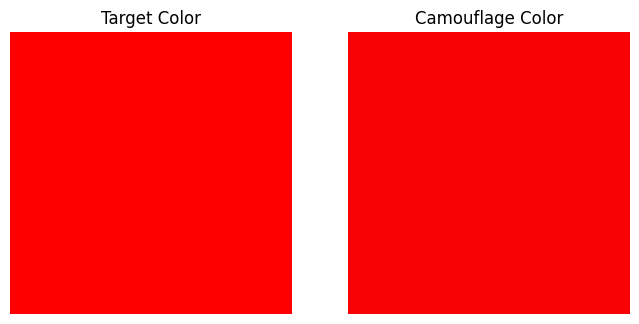

In [9]:
fig , ax = plt.subplots(1,2,figsize = (8,4))

ax[0].imshow(np.reshape(target_rgb/255,(1,1,3)))
ax[1].imshow(np.reshape(best_camouflage/ 255, (1, 1, 3)))

ax[0].axis("off")
ax[1].axis("off")

ax[0].set_title("Target Color")
ax[1].set_title("Camouflage Color")

plt.show()

In [25]:
def calc_fitness(chromosome, target_grid):
    return np.mean(np.abs(chromosome - target_grid))


def evolve_population(population, target_grid, mutation_rate, elite_ratio):
    fitness_values = [calc_fitness(c, target_grid) for c in population]

    elite_index = np.argsort(fitness_values)[: int(len(population) * elite_ratio)]

    elites = [population[i] for i in elite_index]

    new_population = []

    while len(new_population) < len(population) - len(elites):
        parent1, parent2 = random.choices(elites, k=2)

        child = np.zeros(parent1.shape)

        for i in range(len(parent1)):
            for j in range(len(parent1[i])):
                for k in range(len(parent1[i][j])):
                    if random.random() < 0.5:
                        child[i][j][k] = parent1[i][j][k]
                    else:
                        child[i][j][k] = parent2[i][j][k]

                    if random.random() < mutation_rate:
                        child[i][j][k] = np.random.randint(0, 256)

        new_population.append(child)

    return elites + new_population

In [26]:
images = []


def simulate_grid(size, target_grid, generations, mutation_rate, elite_ratio):
    
    grid_size = (16, 16, 3)
    
    population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]

    for i in range(generations):
       
        population = evolve_population(
            population, target_grid, mutation_rate, elite_ratio
        )
       
        best_fit = min(population, key=lambda c: calc_fitness(c, target_grid))
     
        print(f"Generation {i}: Best fitness {calc_fitness(best_fit, target_grid)}")

     
        images.append(best_fit.astype(np.uint8))

        # commented out code for displaying or saving images
        # fig, ax = plt.subplots()
        # ax.imshow(best_fit.astype(np.uint8))
        # plt.title(f'Generation {i}')
        # fig.tight_layout()
        # plt.show()
        # filename = f'camo_images/yellow/gen_{i}.png'
        # plt.savefig(filename)


    return min(population, key=lambda c: calc_fitness(c, target_grid)), images

In [27]:
target_grid = np.zeros((16,16,3), dtype= np.uint8)

target_grid[:] = [0,154,23]

pop_size = 100
num_generations = 50
mut_rate = 0.01
elite_ratio = 0.1
best_camouflage, images = simulate_grid(pop_size, target_grid,num_generations, mut_rate, elite_ratio)

Generation 0: Best fitness 91.86848958333333
Generation 1: Best fitness 90.16145833333333
Generation 2: Best fitness 87.25911458333333
Generation 3: Best fitness 84.58333333333333
Generation 4: Best fitness 81.20963541666667
Generation 5: Best fitness 79.3359375
Generation 6: Best fitness 78.40494791666667
Generation 7: Best fitness 76.56640625
Generation 8: Best fitness 75.42838541666667
Generation 9: Best fitness 74.40494791666667
Generation 10: Best fitness 73.77213541666667
Generation 11: Best fitness 72.2109375
Generation 12: Best fitness 71.73958333333333
Generation 13: Best fitness 69.83984375
Generation 14: Best fitness 69.24609375
Generation 15: Best fitness 68.34635416666667
Generation 16: Best fitness 67.76822916666667
Generation 17: Best fitness 66.87760416666667
Generation 18: Best fitness 65.6953125
Generation 19: Best fitness 65.07942708333333
Generation 20: Best fitness 63.96484375
Generation 21: Best fitness 63.6640625
Generation 22: Best fitness 62.83984375
Generation

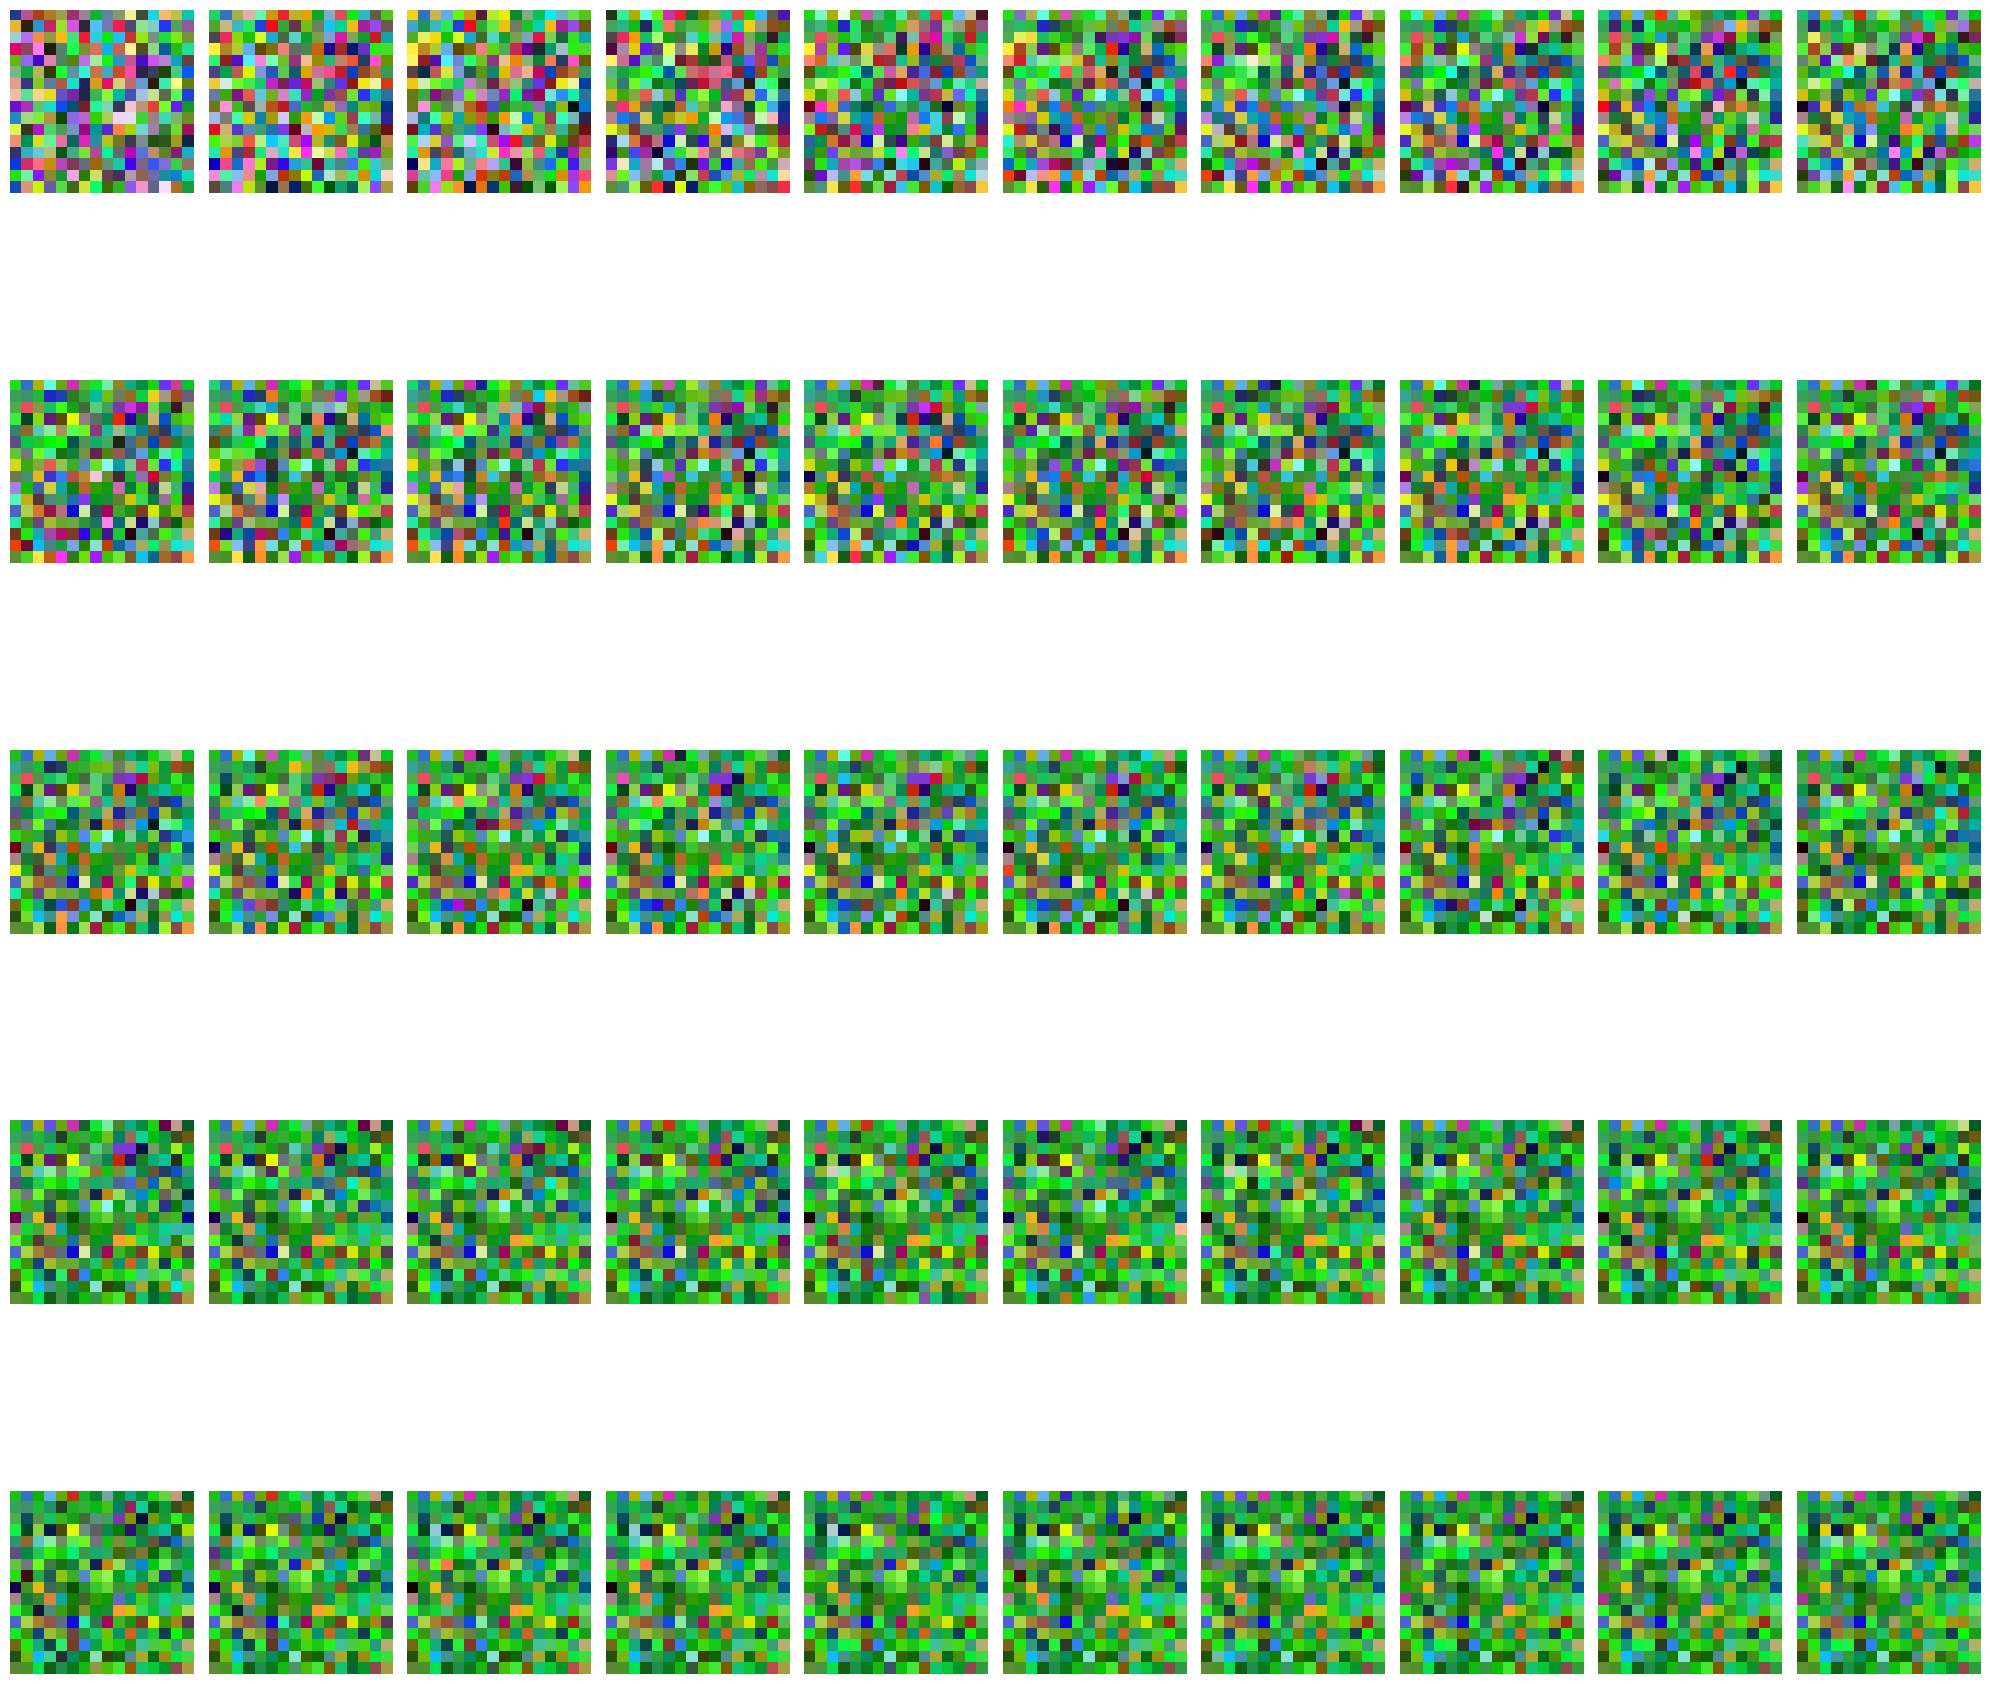

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def display_images(images, num_images = 50, rows = 10, cols = 5):
    fig, axs = plt.subplots(rows, cols, figsize = (20,20))

    for i,ax in enumerate(axs.ravel()):
        if i < num_images:
            ax.imshow(images[i], cmap = 'gray')
            ax.axis('off')
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()
display_images(images, rows=5, cols = 10)